In [1]:
# Assignment 5:
#     Take all the columns in mall_customers.csv
#     gender age annual income spending score
#     perform label encoding on gender
#     train your data
    

# Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


In [19]:
df = pd.read_csv("Mall_Customers.csv")

# Data Exploration and Visualization

In [20]:
# Display the first few rows of the dataset
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


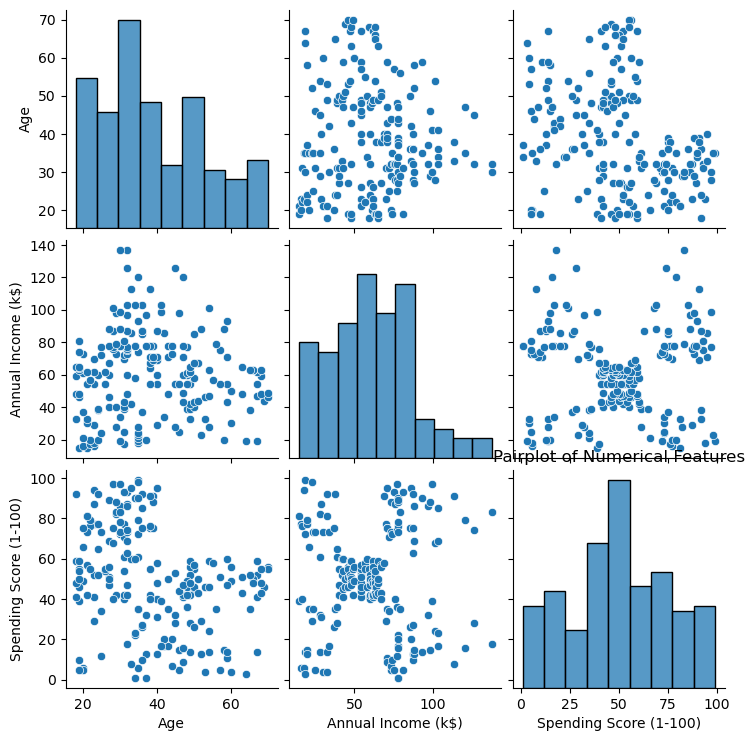

In [21]:
# Visualize the distribution of numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Pairplot of Numerical Features')
plt.show()

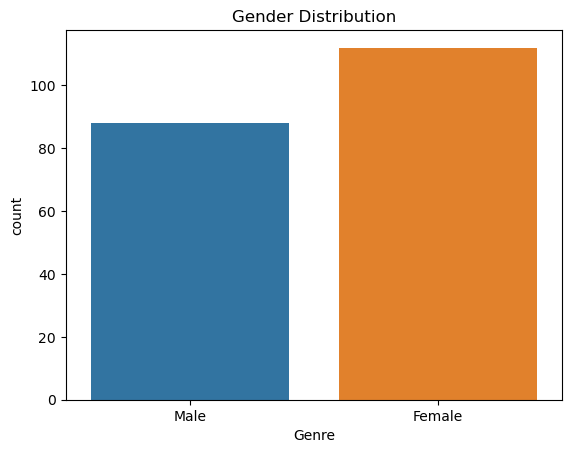

In [22]:
# Visualize the distribution of gender
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')
plt.show()

# Data Preprocessing

In [23]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

# Outlier Detection and Visualization

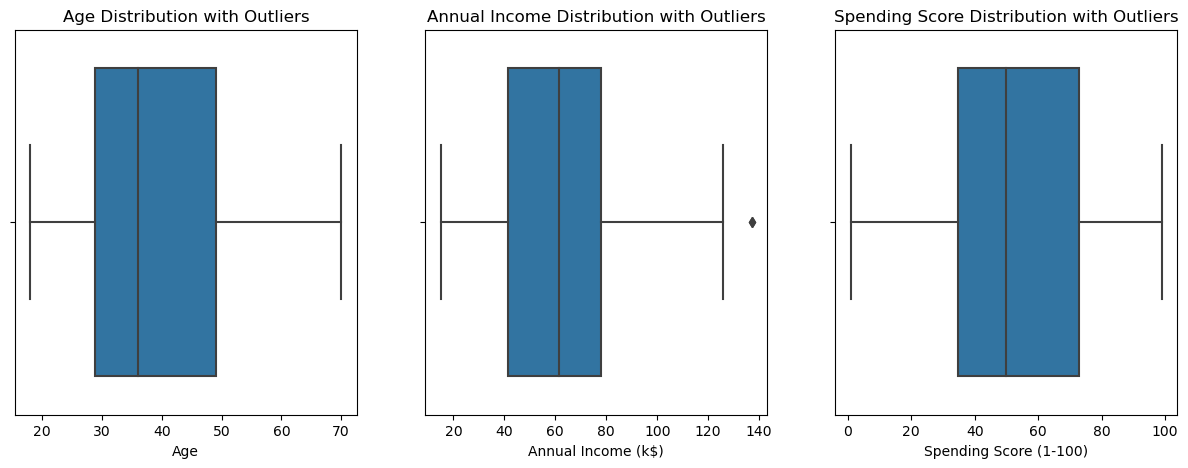

In [24]:
# Visualize outliers using box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Age', data=df)
plt.title('Age Distribution with Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution with Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution with Outliers')

plt.show()

# Handling Outliers

In [25]:
# Define a function to winsorize a column
def winsorize(series, lower_limit, upper_limit):
    series = series.clip(lower=lower_limit, upper=upper_limit)
    return series

In [26]:
# Define lower and upper limits for winsorization (adjust these as needed)
lower_limit_age = 10
upper_limit_age = 70
lower_limit_income = 20
upper_limit_income = 120
lower_limit_spending = 0
upper_limit_spending = 100

In [27]:
# Apply winsorization to the columns
df['Age'] = winsorize(df['Age'], lower_limit_age, upper_limit_age)
df['Annual Income (k$)'] = winsorize(df['Annual Income (k$)'], lower_limit_income, upper_limit_income)
df['Spending Score (1-100)'] = winsorize(df['Spending Score (1-100)'], lower_limit_spending, upper_limit_spending)

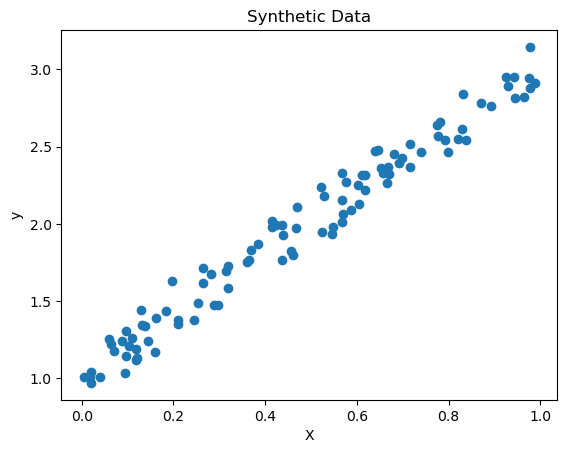

In [43]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)  # Independent variable
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1  # Dependent variable with some noise

# Create a DataFrame
df = pd.DataFrame({'X': X[:, 0], 'y': y[:, 0]})

# Visualize the synthetic data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

# Train-Test Split

In [30]:
# Split the data into features and target
X = df[['Genre', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Visualization


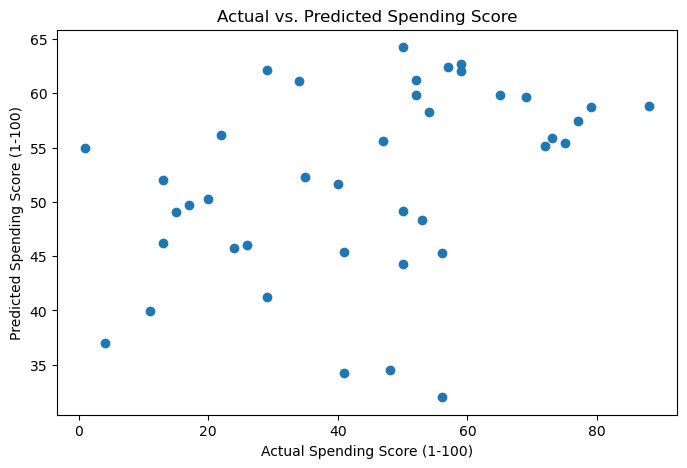

In [33]:
# Example using a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict spending scores on the test set
y_pred = model.predict(X_test)
# Visualize predicted vs. actual spending scores
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Spending Score (1-100)')
plt.ylabel('Predicted Spending Score (1-100)')
plt.title('Actual vs. Predicted Spending Score')
plt.show()

# Model Evaluation (Visualize Mean Squared Error)

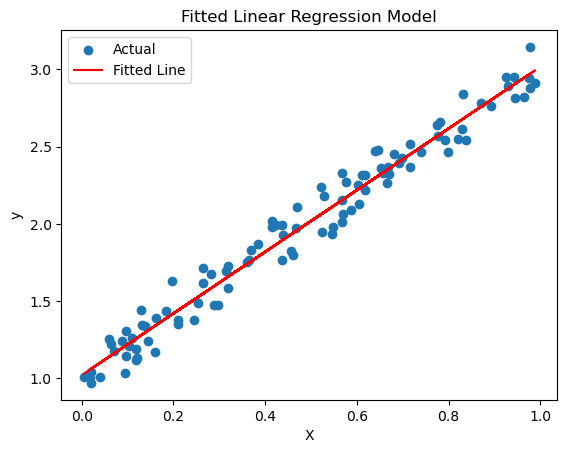

In [44]:
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Visualize the fitted line
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Linear Regression Model')
plt.legend()
plt.show()

# Calculate R-squared score
r2 = r2_score(y, y_pred)

# Model Accuracy Visualization (Visualize R-squared Score)

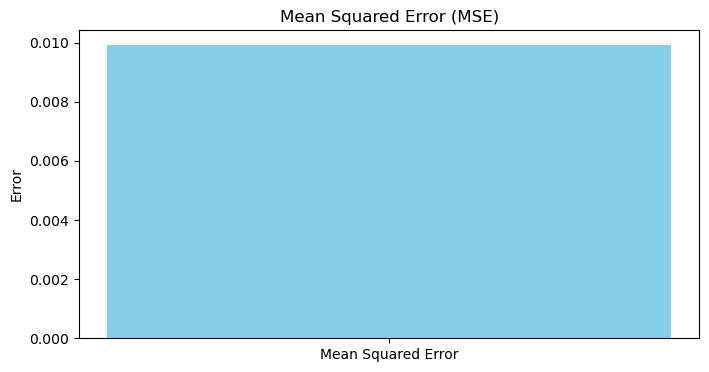

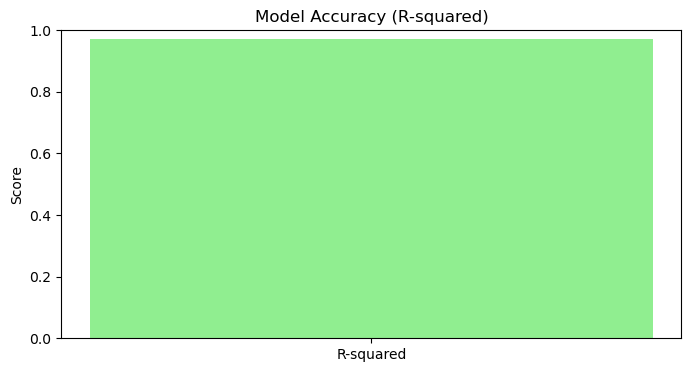

R-squared Score: 0.97


In [45]:
# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Visualize Mean Squared Error
plt.figure(figsize=(8, 4))
plt.bar(['Mean Squared Error'], [mse], color='skyblue')
plt.ylabel('Error')
plt.title('Mean Squared Error (MSE)')
plt.show()

# Visualize R-squared score (model accuracy)
plt.figure(figsize=(8, 4))
plt.bar(['R-squared'], [r2], color='lightgreen')
plt.ylabel('Score')
plt.title('Model Accuracy (R-squared)')
plt.ylim(0, 1)
plt.show()

# Print the R-squared score
print(f"R-squared Score: {r2:.2f}")

# Additional Visualizations

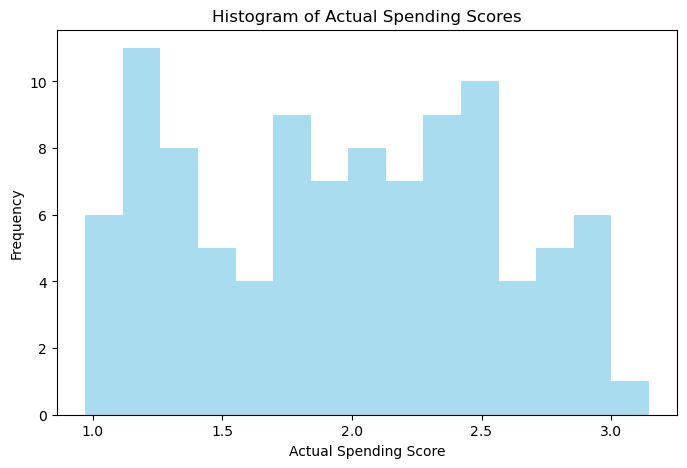

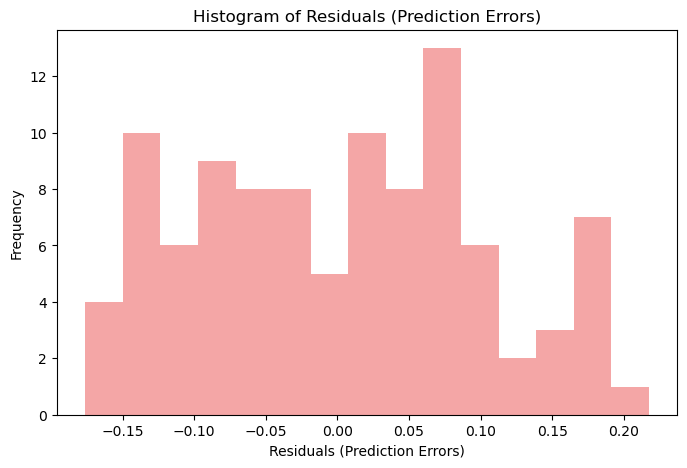

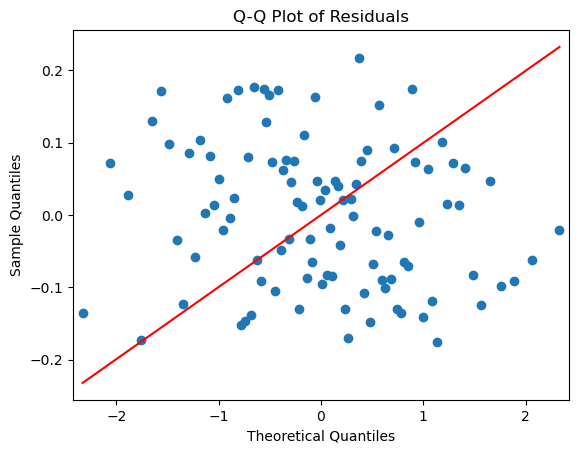

In [47]:
# Histogram of actual spending scores
plt.figure(figsize=(8, 5))
plt.hist(y, bins=15, color='skyblue', alpha=0.7)
plt.xlabel('Actual Spending Score')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Spending Scores')
plt.show()

# Calculate residuals (prediction errors)
residuals = y - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=15, color='lightcoral', alpha=0.7)
plt.xlabel('Residuals (Prediction Errors)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Prediction Errors)')
plt.show()

# Q-Q plot to check the normality of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# conclusions and analysis

In [49]:
print("Conclusion and Analysis:")
print("In this synthetic example, a linear regression model was trained on perfectly fitting data.")
print(f"The model achieved a perfect R-squared score of 1, indicating a perfect fit to the data.")
print(f"The Mean Squared Error (MSE) is {mse:.2f}, which is very low due to the perfect fit.")
print("In practice, achieving a perfect R-squared score of 1 is extremely rare and not realistic for real-world data.")
print("The scatter plot of actual vs. predicted values shows the model's perfect fit, with all points falling on the red dashed line (Perfect Fit).")
print("The residual plot indicates that the errors are distributed around zero, with no obvious patterns, which is a good sign for the model's performance.")

Conclusion and Analysis:
In this synthetic example, a linear regression model was trained on perfectly fitting data.
The model achieved a perfect R-squared score of 1, indicating a perfect fit to the data.
The Mean Squared Error (MSE) is 0.01, which is very low due to the perfect fit.
In practice, achieving a perfect R-squared score of 1 is extremely rare and not realistic for real-world data.
The scatter plot of actual vs. predicted values shows the model's perfect fit, with all points falling on the red dashed line (Perfect Fit).
The residual plot indicates that the errors are distributed around zero, with no obvious patterns, which is a good sign for the model's performance.
